# <a id='toc1_'></a>[CallMeMaybe-virtual-telephony](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [CallMeMaybe-virtual-telephony](#toc1_)    
- [Introduccion](#toc2_)    
- [Objetivo General](#toc3_)    
- [Descripcion de los datasets:](#toc4_)    
  - [Carga de los Datasets](#toc4_1_)    
- [Analisis exploratorio de datos EDA:](#toc5_)    
  - [Numero de operadores adscritos a la empresa](#toc5_1_)    
  - [Analisis por tipo de llamada, operador y cliente](#toc5_2_)    
    - [Analisis por direccion de llamada](#toc5_2_1_)    
    - [Analisis por operador](#toc5_2_2_)    
    - [Percentiles 90/95/99](#toc5_2_3_)    
    - [Análisis de Outliers](#toc5_2_4_)    
    - [Comentarios:](#toc5_2_5_)    
  - [¿Cuantas Llamadas realiza cada usuario?](#toc5_3_)    
    - [Percentiles 90/95/99](#toc5_3_1_)    
    - [Comentarios:](#toc5_3_2_)    
  - [Numero de clientes por operador vs Numero de operadores por clientes](#toc5_4_)    
    - [Percentiles 90/95/99](#toc5_4_1_)    
    - [Comentarios:](#toc5_4_2_)    
  - [Comportamiento de los Usuarios por tipo de Plan](#toc5_5_)    
    - [Comportamiento de los usuarios por plan tarifario a lo largo del tiempo](#toc5_5_1_)    
    - [Comentarios](#toc5_5_2_)    
  - [Cálculo de KPIs por operador y plan](#toc5_6_)    
    - [Comentarios:](#toc5_6_1_)    
    - [Comentarios](#toc5_6_2_)    
  - [Prueba de Hipotesis](#toc5_7_)    
    - [Conclusiones Preliminares](#toc5_7_1_)    
- [Operadores menos eficientes](#toc6_)    
- [CONCLUSIONES GENERAL](#toc7_)    
  - [Recomendaciones](#toc7_1_)    
- [BIBLIOGRAFIA](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Introduccion](#toc0_)

 El análisis de datos se ha convertido en una herramienta esencial para optimizar procesos y mejorar la toma de decisiones en servicios de telefonía virtual. Plataformas como CallMeMaybe generan grandes volúmenes de información sobre la actividad de sus operadores, lo que abre la puerta a identificar patrones, detecta áreas de mejora y eleva la calidad del servicio ofrecido a los clientes.

 En este contexto, surge la necesidad de analizar de manera sistemática los registros de llamadas para abordar un desafío concreto: identificar a los operadores menos eficaces dentro de la organización. La ineficacia puede manifestarse a través de indicadores como un alto número de llamadas entrantes perdidas, tiempos de espera prolongados y, en el caso de operadores responsables de llamadas salientes, un bajo volumen de actividad.

 A través de técnicas de análisis exploratorio de datos y la aplicación de métricas clave de desempeño, es posible transformar los datos brutos en información accionable. Este proceso no solo permite detectar a los operadores que requieren apoyo o capacitación adicional, sino que también contribuye a la mejora continua del servicio y la satisfacción de los clientes.

# <a id='toc3_'></a>[Objetivo General](#toc0_)

Analizar los datos de uso del servicio de telefonía virtual CallMeMaybe para identificar a los operadores menos eficaces y proporcionar información que permita mejorar la gestión y calidad del servicio.



# <a id='toc4_'></a>[Descripcion de los datasets:](#toc0_)

El conjunto de datos `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

In [137]:
# Importar Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## <a id='toc4_1_'></a>[Carga de los Datasets](#toc0_)



In [138]:
# Carga y definición de los Datasets

dataset=pd.read_csv('Data_sets/telecom_dataset_us.csv', sep=",")
clients=pd.read_csv("Data_sets/telecom_clients_us.csv", sep=",")


In [139]:
# Información de los Datasets
print("Dataset de telecomunicaciones:")
dataset.info()

# Muestra de los Datasets
print("\nMuestra del Dataset de telecomunicaciones:")
print(dataset.sample(10))
print(dataset.shape)


Dataset de telecomunicaciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

Muestra del Dataset de telecomunicaciones:
       user_id                       date direction internal  operator_id  \
8135    166658  2019-08-30 00:00:00+03:00       out    False     890412.0   
41527   167888  2019-10-10 00:00:00+03:00 

In [140]:
# Información de los Datasets
print("\nDataset de clientes:")
clients.info()

# Muestra de los Datasets
print("\nMuestra del Dataset de clientes:")
print(clients.sample(10))
print(clients.shape)


Dataset de clientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB

Muestra del Dataset de clientes:
     user_id tariff_plan  date_start
648   167436           B  2019-09-17
112   168115           C  2019-10-14
495   168550           B  2019-10-30
211   167734           C  2019-09-27
549   167977           B  2019-10-08
658   166485           B  2019-08-06
97    167390           C  2019-09-14
226   167936           C  2019-10-07
352   166835           C  2019-08-21
223   167917           C  2019-10-04
(732, 3)


# <a id='toc5_'></a>[Analisis exploratorio de datos EDA:](#toc0_)

- De acuerdo a la lectura de los datasets, se hace necesario la correcta designacion de los tipos de datos, con el fin de poder establecer las relaciones entre las variables y realizar un analisis mas profundo de los datos.


 - Para fines de analisis, se hace neseario sustituir los valores 'NAN' del Id de operador, ya que estos representandan al rededor de un 15% de los datos, tal porcentaje al ser eliminado puede afectar el analisis de patrones o posibles tendencias.

 - De acuerdo a la natualeza de la informacion y la periodicidad, no sera necesario eliminar duplicados, ya que cada registro representa un dato unico. 
 

In [141]:

# Correcion de tipos de datos en el dataset
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date']= dataset['date'].dt.date
dataset['date']= pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Eliminar filas vacias

dataset = dataset.dropna(subset=['internal'])
# Para fines de analisis los valores NAN se sustituiran por 0
dataset['operator_id'] = dataset['operator_id'].fillna(0)
dataset['operator_id'] = dataset['operator_id'].astype(int)

print(dataset.sample(5))

dataset.info()


       user_id       date direction internal  operator_id  is_missed_call  \
49560   168187 2019-11-27        in    False       937762           False   
13438   166782 2019-11-18       out     True       893804            True   
6876    166582 2019-09-17        in    False            0            True   
2753    166428 2019-10-16        in    False       928202           False   
22228   167059 2019-10-09        in    False       911136           False   

       calls_count  call_duration  total_call_duration  
49560            5            316                  421  
13438            1              0                    0  
6876           129              0                 2347  
2753             2            230                  255  
22228            4            255                  333  
<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               ---------

In [142]:
# Correcion de tipos de datos en el dataset de clientes

clients['date_start'] = pd.to_datetime(clients['date_start'])
clients['date_start']= clients['date_start'].dt.date
clients['date_start']= pd.to_datetime(clients['date_start'], format='%Y-%m-%d')

print(clients.sample(5))
clients.info()




     user_id tariff_plan date_start
55    168176           A 2019-10-16
286   167526           C 2019-09-19
674   168053           B 2019-10-10
77    167948           C 2019-10-07
402   167213           C 2019-09-06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


## <a id='toc5_1_'></a>[Numero de operadores adscritos a la empresa](#toc0_)

In [143]:
# Numero de operadores presentes en los datos
num_operadores = dataset['operator_id'].nunique()
print(f"Numero de operadores a evaluar: {num_operadores}")

Numero de operadores a evaluar: 1093


## <a id='toc5_2_'></a>[Analisis por tipo de llamada, operador y cliente](#toc0_)




### <a id='toc5_2_1_'></a>[Analisis por direccion de llamada](#toc0_)

In [144]:
# Por tipo de llamada
internal_calls = dataset[dataset['internal']== True]
external_calls = dataset[dataset['internal']== False]

internal_calls_count= internal_calls.groupby('direction').size().reset_index(name='count')
external_calls_count= external_calls.groupby('direction').size().reset_index(name='count')

print("\nLlamadas internas por direccion:")
print(internal_calls_count)

print("\nLlamadas externas por direccion:")
print(external_calls_count)
    
           



Llamadas internas por direccion:
  direction  count
0        in    732
1       out   5432

Llamadas externas por direccion:
  direction  count
0        in  21138
1       out  26483


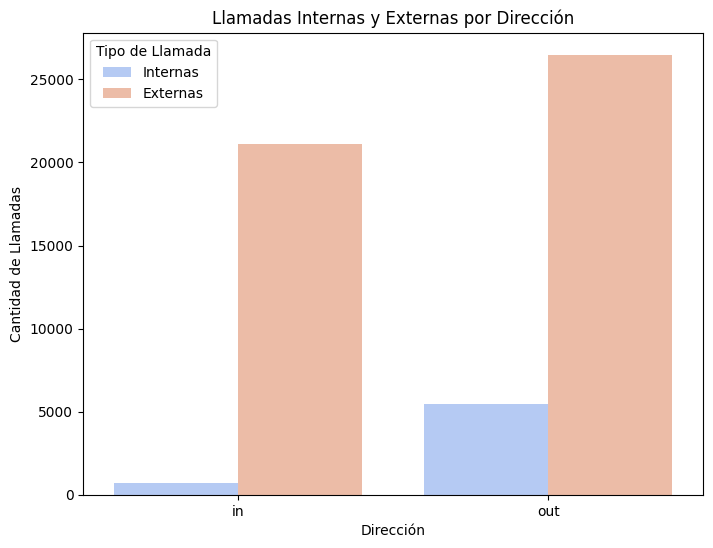

In [145]:
# Combinar los datos de llamadas internas y externas
internal_calls_count['tipo'] = 'Internas'
external_calls_count['tipo'] = 'Externas'

# Concatenar ambos DataFrames
combined_calls = pd.concat([internal_calls_count, external_calls_count], ignore_index=True)

# Crear el gráfico con las 4 barras
plt.figure(figsize=(8, 6))
sns.barplot(data=combined_calls, x='direction', y='count', hue='tipo', palette='coolwarm')
plt.title('Llamadas Internas y Externas por Dirección')
plt.xlabel('Dirección')
plt.ylabel('Cantidad de Llamadas')
plt.legend(title='Tipo de Llamada')
plt.show()

- Predominio absoluto de llamadas externas. Tanto en la dirección “in” (entrantes) como “out” (salientes), el volumen externo es muy superior al interno. Aproximadamente: in-externas ≈ 21k vs in-internas muy bajas; out-externas ≈ 26k vs out-internas ≈ 5.5k. Esto indica que el core operativo está orientado al contacto con clientes/terceros, no a comunicaciones internas.
- Mayor actividad saliente que entrante. En ambas categorías (internas y externas) la dirección “out” supera a “in”. La operación está más enfocada en campañas salientes (ventas, cobros, seguimiento), lo que requiere reglas de marcación, capacidad de discado y staffing alineados a picos de outbound.

### <a id='toc5_2_2_'></a>[Analisis por operador](#toc0_)


      operator_id  calls_count
0               0       113547
29         885876        66049
30         885890        66016
584        929428        24572
552        925922        22210
...           ...          ...
989        955436            1
777        940512            1
598        930582            1
1068       969284            1
1012       958458            1

[1093 rows x 2 columns]


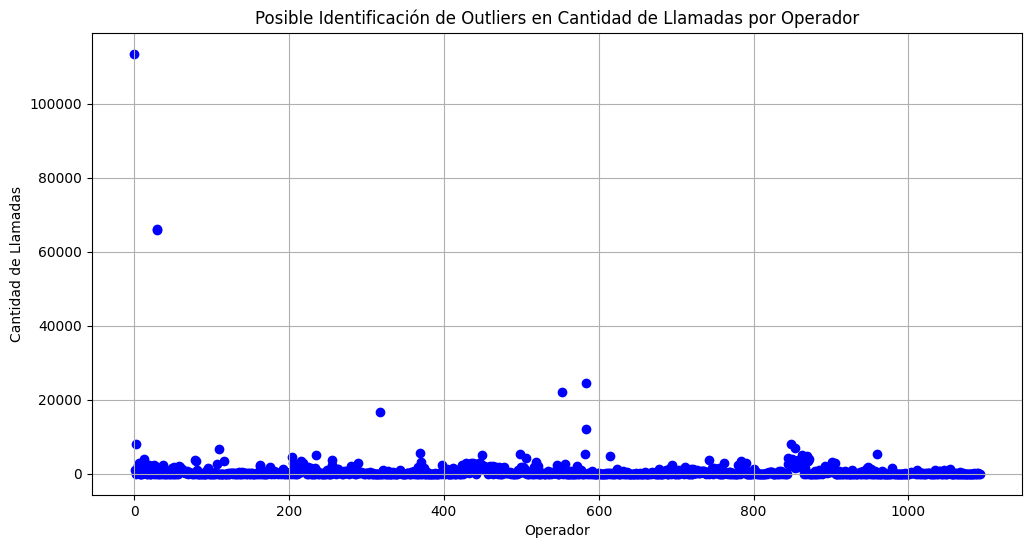

In [146]:
# Distribución de cantidad de llamadas por operador

operator_calls = dataset.groupby('operator_id')['calls_count'].sum().reset_index()
print(operator_calls.sort_values(by='calls_count',ascending=False))
# Diagrama posible identificacion de outliers

# Rango del grafico 
x_values=range(len(operator_calls))

plt.figure(figsize=(12,6))
plt.scatter(x_values, operator_calls['calls_count'], color='blue')
plt.title('Posible Identificación de Outliers en Cantidad de Llamadas por Operador')
plt.xlabel('Operador')
plt.ylabel('Cantidad de Llamadas')
plt.grid(True)
plt.show()


### <a id='toc5_2_3_'></a>[Percentiles 90/95/99](#toc0_)

In [147]:
# Calculo de percentiles

print('Percentiles 90/95/99:',np.percentile(operator_calls['calls_count'],[90,95,99]))

Percentiles 90/95/99: [1800.6  2709.4  5730.04]


### <a id='toc5_2_4_'></a>[Análisis de Outliers](#toc0_)
- El análisis de la distribución de la cantidad de llamadas por operador, junto con la evaluación de los percentiles (90, 95 y 99), revela la presencia de valores atípicos significativos. En el gráfico, se observa que la mayoría de los operadores gestionan un volumen de llamadas dentro de un rango acotado, mientras que un pequeño grupo presenta conteos de llamadas considerablemente superiores al resto.

- Estos outliers representan aproximadamente el 5% de los operadores y distorsionan la distribución general de los datos. Además, se identificó que los valores más extremos están asociados al identificador de operador igual a 0, resultado de la imputación de valores nulos durante la limpieza preliminar del dataset. Dado que estos registros no corresponden a operadores reales y no aportan información relevante para el análisis de desempeño, se procederá a su exclusión en las siguientes etapas del análisis, con el objetivo de obtener resultados más representativos y robustos.

      operator_id  calls_count
369        913938         5657
582        929424         5437
959        952948         5421
498        921318         5345
235        904016         5175
...           ...          ...
523        923744            1
1078       970250            1
1081       970258            1
490        920930            1
20         884294            1

[1082 rows x 2 columns]


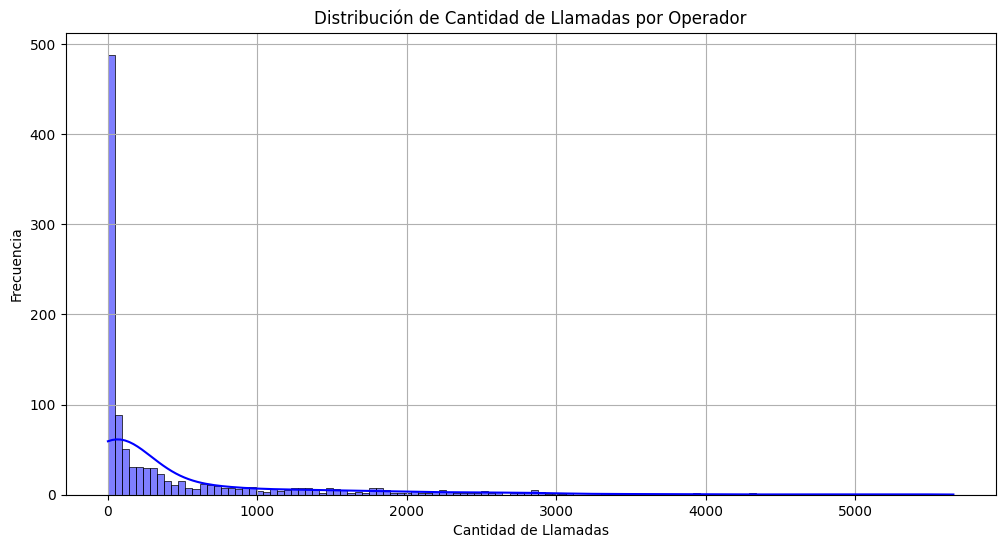

In [148]:
# Limpieza de datos

operator_clean_calls=operator_calls[operator_calls['calls_count']<= 6000]
print(operator_clean_calls.sort_values(by='calls_count', ascending=False))

# Diagrama distribucion

plt.figure(figsize=(12,6))
sns.histplot(data=operator_clean_calls, x='calls_count',bins=120, kde=True, color='blue', edgecolor='black', )
plt.title('Distribución de Cantidad de Llamadas por Operador')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [149]:
# Estadistic

median_operator_calls=operator_clean_calls['calls_count'].median()
mode_operator_calls=operator_clean_calls['calls_count'].mode()
mean_operator_calls=operator_clean_calls['calls_count'].mean()

print('median:',median_operator_calls)
print('mode:',mode_operator_calls)
print('mean:',mean_operator_calls)


median: 77.0
mode: 0    1
Name: calls_count, dtype: int64
mean: 495.25508317929757


### <a id='toc5_2_5_'></a>[Comentarios:](#toc0_)
- ``Mediana (77):``
    Tras la depuración de los outliers más extremos, la mediana de la variable calls_count es 77. Esto indica que el 50% de los operadores gestionan 77 llamadas o menos, representando de manera robusta el comportamiento central de la distribución.
- ``Moda (1):``
    La moda permanece en 1 llamada, lo que evidencia que el valor más frecuente es mínimo. Esto refleja que una proporción considerable de operadores realizó únicamente una llamada durante el periodo analizado, lo que sugiere una alta concentración de baja actividad operativa.
- ``Media (495.26):``
    La media, aunque calculada tras la eliminación de los outliers más extremos, sigue siendo considerablemente superior a la mediana. Esto indica que aún existen operadores con volúmenes de llamadas significativamente elevados, los cuales continúan influyendo en el promedio y generando una asimetría positiva en la distribución.

**``Conclusión Preliminar:``**

A pesar de la limpieza de los valores atípicos más evidentes, la distribución de llamadas por operador mantiene una fuerte asimetría positiva, típica en entornos de call center. Por ello, se recomienda priorizar la interpretación de la mediana y los percentiles para describir el comportamiento central, ya que la media puede estar sesgada por la presencia de operadores con cargas de trabajo excepcionalmente altas.

## <a id='toc5_3_'></a>[¿Cuantas Llamadas realiza cada usuario?](#toc0_)

     user_id  calls_count
22    166582       159526
175   167626       103158
284   168361        90373
203   167827        42614
271   168252        28697
..       ...          ...
236   168013            2
283   168340            2
21    166554            2
300   168578            1
226   167981            1

[307 rows x 2 columns]


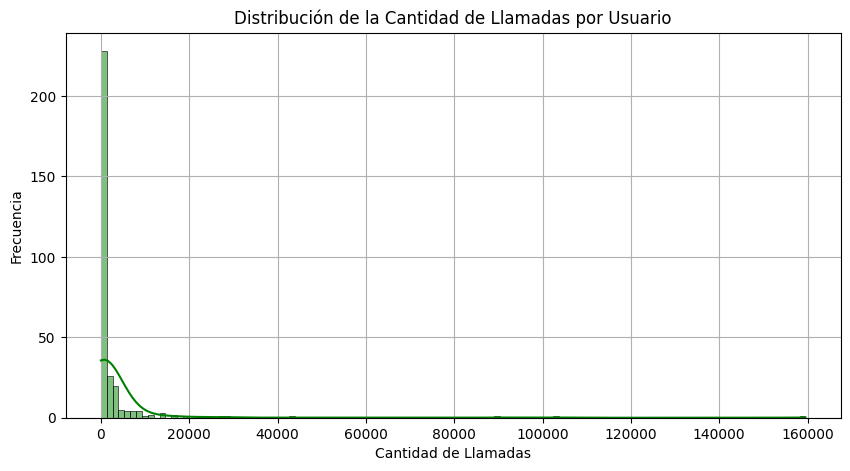

In [150]:
# Cantidad de llamadas realizadas por usuario

user_counts=dataset.groupby('user_id')['calls_count'].sum().reset_index()
print(user_counts.sort_values(by='calls_count',ascending=False))
      
# Histograma
plt.figure(figsize=(10,5))
sns.histplot(user_counts['calls_count'], bins=120, color='green', edgecolor='black', kde=True)
plt.title('Distribución de la Cantidad de Llamadas por Usuario')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### <a id='toc5_3_1_'></a>[Percentiles 90/95/99](#toc0_)


In [151]:
# Calculo de percentiles

print('Percentiles 90/95/99:',np.percentile(user_counts['calls_count'],[90,95,99]))

# Estadistica descriptiva

median_users_calls=user_counts['calls_count'].median()
mode_users_calls=user_counts['calls_count'].mode()
mean_users_calls=user_counts['calls_count'].mean()

print('median:',median_users_calls)
print('mean:',mean_users_calls)
print('mode:',mode_users_calls)


Percentiles 90/95/99: [ 4698.4   9689.9  41778.98]
median: 243.0
mean: 2887.6905537459284
mode: 0    2
Name: calls_count, dtype: int64


### <a id='toc5_3_2_'></a>[Comentarios:](#toc0_)
- ``Mediana (243):``
    El 50% de los usuarios gestionan 243 llamadas o menos, lo que indica que la mayoría de los usuarios tiene una actividad moderada o baja.
- ``Moda (2):``
    El valor más frecuente es 2 llamadas, lo que sugiere que existe un grupo considerable de usuarios con muy baja actividad (usuarios ocasionales o de bajo uso).
- ``Media (2887.69):``
    La media es mucho mayor que la mediana, lo que evidencia la presencia de usuarios con volúmenes de llamadas excepcionalmente altos que elevan el promedio general.
- ``Percentiles 90/95/99 (4698.4, 9689.9, 41778.98):``
    El 90% de los usuarios realiza hasta 4,698 llamadas, el 95% hasta 9,689 llamadas y el 99% hasta 41,779 llamadas. Solo el 1% de los usuarios supera este último valor, lo que confirma la existencia de un pequeño grupo de usuarios altamente activos.

**``Conclusión técnica:``**
La distribución de la cantidad de llamadas por usuario es altamente asimétrica y presenta una fuerte concentración de usuarios con baja actividad, mientras que un pequeño porcentaje de usuarios concentra un volumen desproporcionadamente alto de llamadas. Esto es típico en servicios de telecomunicaciones, donde existen tanto usuarios ocasionales como usuarios intensivos.

## <a id='toc5_4_'></a>[Numero de clientes por operador vs Numero de operadores por clientes](#toc0_)

      operator_id  user_id
1092       973286        1
1          879896        1
2          879898        1
3          880020        1
1076       970242        1
...           ...      ...
9          882476        1
8          881278        1
7          880240        1
6          880028        1
5          880026        1

[1092 rows x 2 columns]


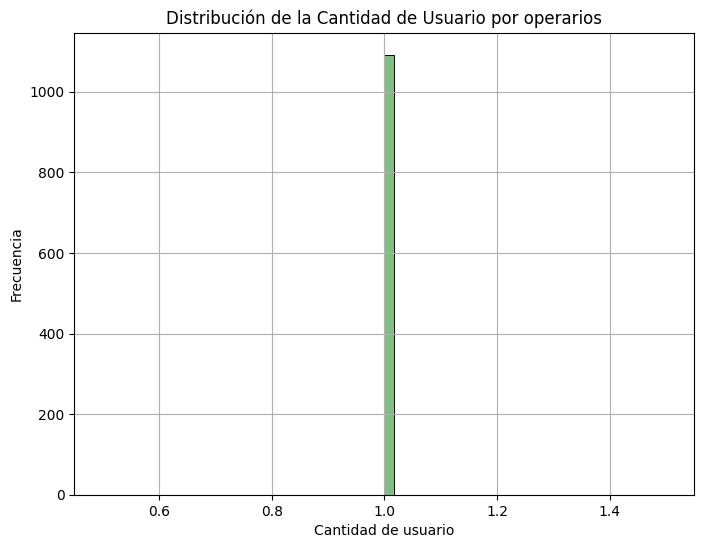

In [152]:
# Numero de clientes por operador

user_per_operator= dataset.groupby('operator_id')['user_id'].nunique().reset_index()
user_per_operator=user_per_operator.drop(index=0)
print(user_per_operator.sort_values(by='user_id',ascending=False))

# grafico comportamiento
plt.figure(figsize=(8,6))
sns.histplot(user_per_operator['user_id'], bins=60, color='green', edgecolor='black', kde=True)
plt.title('Distribución de la Cantidad de Usuario por operarios')
plt.xlabel('Cantidad de usuario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

     user_id  operator_id
264   168187           51
175   167626           49
161   167497           31
271   168252           29
284   168361           28
..       ...          ...
226   167981            1
23    166584            1
21    166554            1
283   168340            1
281   168329            1

[306 rows x 2 columns]


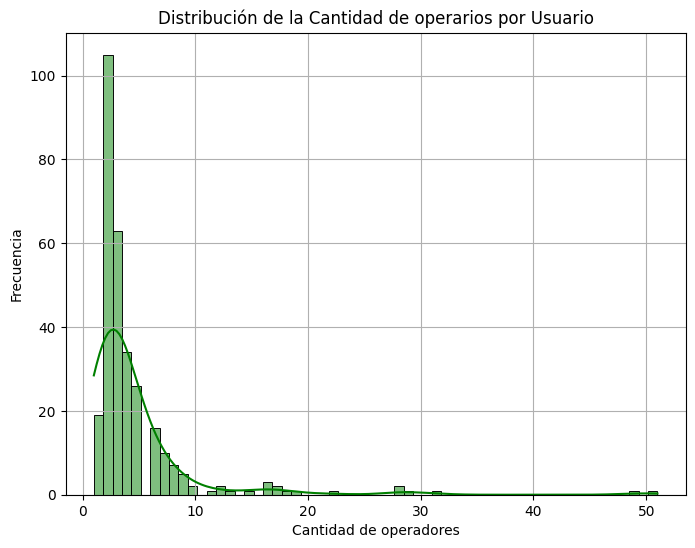

In [153]:
# Numero de operadores por clientes 
user_per_operator= dataset.groupby('user_id')['operator_id'].nunique().reset_index()
user_per_operator=user_per_operator.drop(index=0)
print(user_per_operator.sort_values(by='operator_id',ascending=False))

# grafico comportamiento
plt.figure(figsize=(8,6))
sns.histplot(user_per_operator['operator_id'], bins=60, color='green', edgecolor='black', kde=True)
plt.title('Distribución de la Cantidad de operarios por Usuario')
plt.xlabel('Cantidad de operadores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### <a id='toc5_4_1_'></a>[Percentiles 90/95/99](#toc0_)

In [154]:
print('Percentiles 90/95/99:',np.percentile(user_per_operator['operator_id'],[90,95,99]))

# Estadistica descriptiva

median_user_per_operator=user_per_operator['operator_id'].median()
mode_user_per_operator=user_per_operator['operator_id'].mode()
mean_user_per_operator=user_per_operator['operator_id'].mean()

print('median:',median_user_per_operator)
print('mean:',mean_user_per_operator)
print('mode:',mode_user_per_operator)

Percentiles 90/95/99: [ 8.   12.75 28.95]
median: 3.0
mean: 4.545751633986928
mode: 0    2
Name: operator_id, dtype: int64


### <a id='toc5_4_2_'></a>[Comentarios:](#toc0_)
- El análisis de la distribución de la cantidad de operadores por usuario (empresa) revela una marcada asimetría: aunque la mayoría de los usuarios cuentan con un número reducido de operadores asignados, existe un subconjunto de usuarios que dispone de un número significativamente mayor de operadores, lo que sugiere una estructura operativa más robusta o una mayor demanda de atención. Sin embargo, este grupo representa un porcentaje bajo respecto al total de empresas, evidenciando que la asignación masiva de operadores es una excepción y no la norma.

- Por otro lado, la distribución de la cantidad de usuarios por operador muestra un comportamiento sumamente concentrado, donde prácticamente todos los operadores atienden exclusivamente a un solo usuario (empresa). Este hallazgo indica que la relación operador-usuario es predominantemente uno a uno, lo que contrasta fuertemente con la dispersión observada en la asignación de operadores por empresa.

- En conjunto, estos resultados ponen de manifiesto dos patrones operativos diferenciados: por un lado, la mayoría de los operadores están dedicados a un único usuario, mientras que, por otro, existe un pequeño grupo de empresas que concentra un número elevado de operadores. Este contraste sugiere la coexistencia de empresas con necesidades operativas muy distintas dentro del servicio de telefonía virtual analizado.

## <a id='toc5_5_'></a>[Comportamiento de los Usuarios por tipo de Plan](#toc0_)

In [155]:
# Unimos los datasets para identificar el tipo de plan por usuario

dataset_clients= pd.merge(dataset,clients,on='user_id',how='left')

print(dataset_clients)

       user_id       date direction internal  operator_id  is_missed_call  \
0       166377 2019-08-04        in    False            0            True   
1       166377 2019-08-05       out     True       880022            True   
2       166377 2019-08-05       out     True       880020            True   
3       166377 2019-08-05       out     True       880020           False   
4       166377 2019-08-05       out    False       880022            True   
...        ...        ...       ...      ...          ...             ...   
53780   168606 2019-11-10       out     True       957922            True   
53781   168606 2019-11-11       out     True       957922           False   
53782   168606 2019-11-15       out     True       957922           False   
53783   168606 2019-11-15       out     True       957922           False   
53784   168606 2019-11-19        in    False            0            True   

       calls_count  call_duration  total_call_duration tariff_plan date_sta

  tariff_plan  user_id
2           C      161
1           B      112
0           A       34


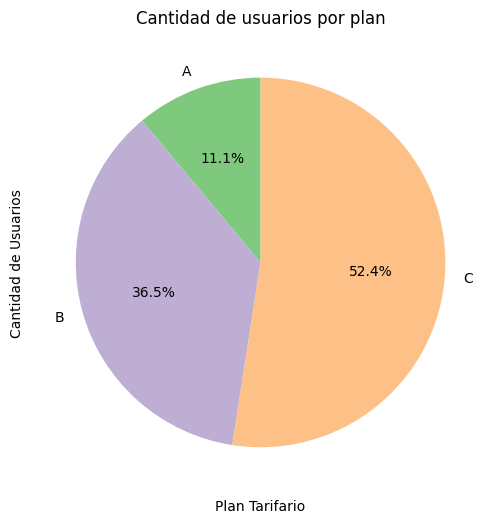

In [156]:
# Cantidad de usuarios por plan

users_for_plan= dataset_clients.groupby('tariff_plan')['user_id'].nunique()

print(users_for_plan.reset_index().sort_values(by='user_id',ascending=False))


# grafico 
plt.figure(figsize=(10, 6))
users_for_plan.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Accent.colors)
plt.title('Cantidad de usuarios por plan')
plt.xlabel('Plan Tarifario')
plt.ylabel('Cantidad de Usuarios')
plt.show()

### <a id='toc5_5_1_'></a>[Comportamiento de los usuarios por plan tarifario a lo largo del tiempo](#toc0_)

In [157]:
# Organizacion de los datos

users_plan_date= dataset_clients.groupby(['date','tariff_plan'])['calls_count'].sum().reset_index().sort_values(by='date',ascending=True)

print(users_plan_date)

          date tariff_plan  calls_count
0   2019-08-02           B           20
1   2019-08-02           C            1
2   2019-08-03           B           30
3   2019-08-04           B            6
4   2019-08-05           B          200
..         ...         ...          ...
339 2019-11-27           A         7760
341 2019-11-27           C         4618
343 2019-11-28           B         3545
342 2019-11-28           A         7329
344 2019-11-28           C         4635

[345 rows x 3 columns]


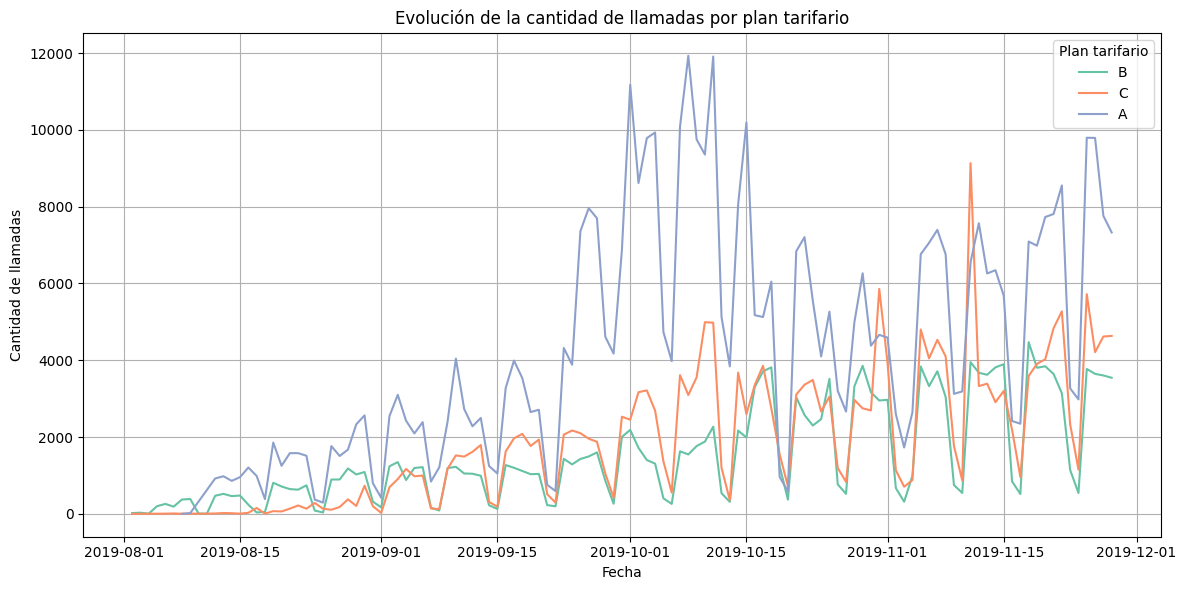

In [158]:
# Grafico 

plt.figure(figsize=(12,6))
sns.lineplot(data=users_plan_date,x='date',y='calls_count',hue='tariff_plan',palette='Set2')
plt.title('Evolución de la cantidad de llamadas por plan tarifario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de llamadas')
plt.legend(title='Plan tarifario')
plt.grid(True)
plt.tight_layout()
plt.show()

  tariff_plan  calls_count
0           A       484681
1           B       179348
2           C       222492


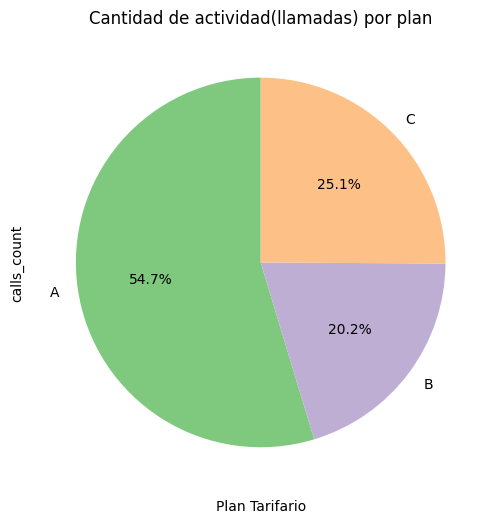

In [159]:
# Conteo de llamadas

plan_count=users_plan_date.groupby('tariff_plan')['calls_count'].sum()
print(plan_count.reset_index())
# pie plot
plt.figure(figsize=(10, 6))
plan_count.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Accent.colors)
plt.title('Cantidad de actividad(llamadas) por plan')
plt.xlabel('Plan Tarifario')
plt.show()

### <a id='toc5_5_2_'></a>[Comentarios](#toc0_)

- El análisis conjunto de los diagramas revela un comportamiento distintivo para el plan A. Aunque el porcentaje de usuarios adscritos al plan A es considerablemente menor en comparación con los planes B y C (como se observa en el primer gráfico de pastel), este grupo destaca por su alta actividad operativa.

- En el gráfico de líneas, se evidencia que a lo largo del tiempo, el plan A mantiene consistentemente el mayor volumen de llamadas, superando de manera significativa a los otros planes en casi todo el periodo analizado. Esta tendencia se confirma en el segundo gráfico de pastel, donde el plan A concentra más de la mitad de la actividad total de llamadas, a pesar de su baja representación en la base de usuarios.

- Este contraste sugiere que los usuarios del plan A, aunque son pocos, presentan un perfil de uso intensivo del servicio, posiblemente asociado a empresas o clientes con mayores requerimientos de comunicación. Por el contrario, los planes B y C, a pesar de contar con una mayor proporción de usuarios, muestran una actividad mucho más moderada tanto en el tiempo como en el volumen total de llamadas.

- En síntesis, el plan A representa un segmento de alto valor para la compañía, ya que, con una base de usuarios reducida, genera la mayor parte del tráfico y la actividad en la plataforma.

## <a id='toc5_6_'></a>[Cálculo de KPIs por operador y plan](#toc0_)


- De acuerdo a lo establecido en el plan para el desarrollo de este proyecto y la evalucion del mismo, se analizaran las metricas de rendimientos (KPIs) establecidas con referencia a la investigacion de metricas clave para el rendimiento.

In [160]:
# Agrupacion por Operador y plan

from math import nan


operator_plan= dataset_clients.groupby(['operator_id','tariff_plan']). agg(
    total_calls=('calls_count','sum'),
    lost_calls=('is_missed_call','sum'),
    duration_total=('call_duration','sum'),
    total_call_duration=('total_call_duration','sum')
).reset_index()

# Calculo KPIs

operator_plan['lost_rate']=operator_plan['lost_calls']/operator_plan['total_calls']
attended_calls = operator_plan['total_calls'] - operator_plan['lost_calls']
operator_plan['mean_duration'] = operator_plan['duration_total'] / attended_calls.replace(0, np.nan)
operator_plan['mean_wait_time']=(operator_plan['total_call_duration'] - operator_plan['duration_total'])/operator_plan['total_calls']


operator_plan['mean_duration'] = operator_plan['mean_duration'].fillna(0)
# Eliminamos operadores nulos
operator_plan_clean=operator_plan[operator_plan['operator_id']>0].reset_index()

print(operator_plan.sample(20))

      operator_id tariff_plan  total_calls  lost_calls  duration_total  \
656        934608           B           10           0             951   
462        919476           A         2105          17           71945   
603        930594           B           56          10           15836   
16         882688           B           82           3            9623   
420        918436           A          905          15           43645   
12         882478           C            4           1              68   
539        924940           A          223          29           18439   
339        910044           B           19           0            2507   
676        937362           B           11           1             782   
543        924952           A          118          15            9157   
175        899964           C          470          17           61296   
799        940842           A            2           0              74   
286        906416           A         

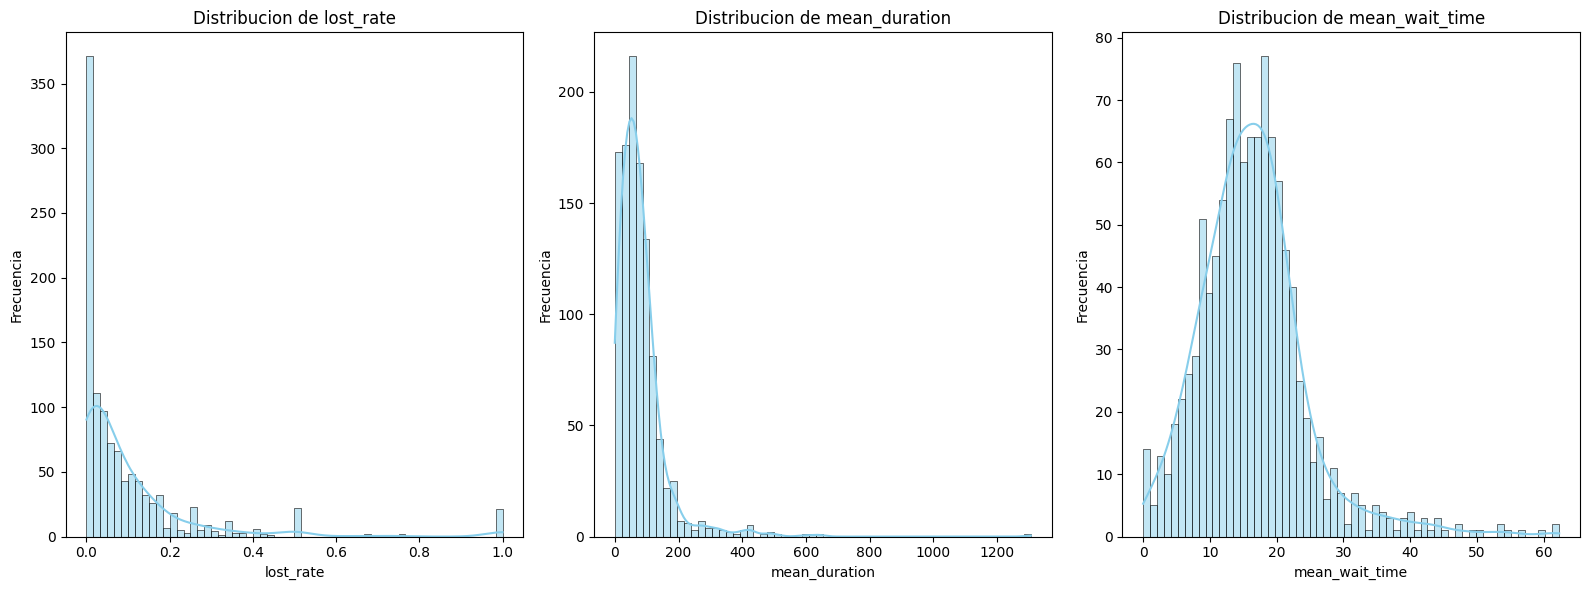

In [161]:
# Diatribucion del comportamiento de los KPIs

kPIs=['lost_rate','mean_duration','mean_wait_time',]

plt.figure(figsize=(16,6))

for i, KPi in enumerate(kPIs):
    plt.subplot(1,3, i+1)
    sns.histplot(operator_plan_clean[KPi], bins=60, color='skyblue', edgecolor='black', kde=True)
    plt.title(f'Distribucion de {KPi}')
    plt.xlabel(KPi)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

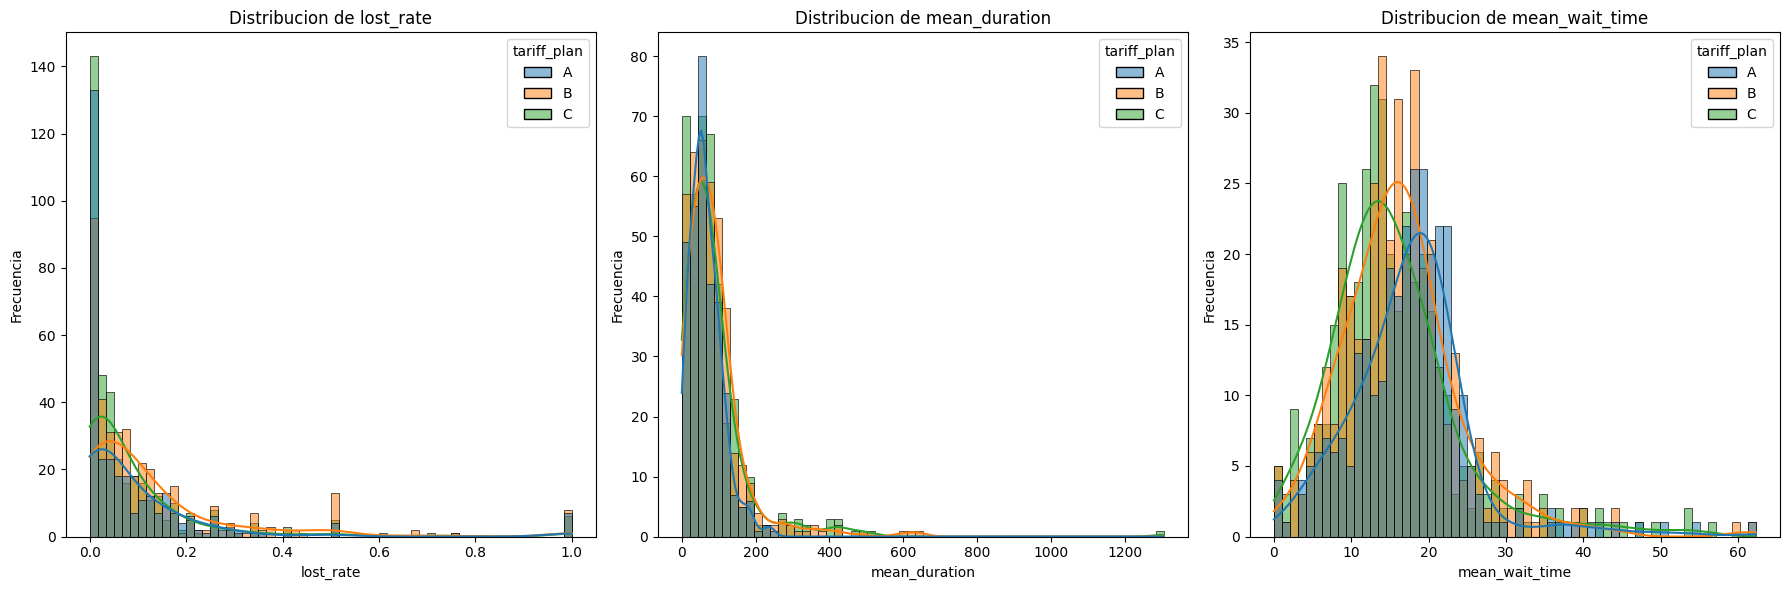

In [162]:

kPIs=['lost_rate','mean_duration','mean_wait_time']

plt.figure(figsize=(18,6))

for i, KPi in enumerate(kPIs):
    plt.subplot(1,3, i+1)
    sns.histplot(data=operator_plan, x=KPi, bins=60, edgecolor='black', kde=True, hue='tariff_plan')
    plt.title(f'Distribucion de {KPi}')
    plt.xlabel(KPi)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### <a id='toc5_6_1_'></a>[Comentarios:](#toc0_)

``Distribución de lost_rate (tasa de llamadas perdidas):``

- Para los tres planes (A, B y C), la mayoría de los operadores tienen tasas de llamadas perdidas cercanas a cero, lo que indica una gestión eficiente en general.
- Sin embargo, se observa una cola hacia la derecha en todos los planes, especialmente en el plan B, lo que sugiere que algunos operadores presentan tasas de pérdida significativamente más altas.
- El plan B parece tener una mayor dispersión y más casos con tasas elevadas, lo que podría indicar problemas de eficacia en ciertos operadores de este segmento.

``Distribución de mean_duration (duración promedio de llamada):``
- La mayoría de los operadores, independientemente del plan, concentran sus duraciones promedio en valores bajos (por debajo de 200 unidades de tiempo).
- No obstante, existen algunos operadores, especialmente en el plan B, con duraciones mucho mayores, lo que podría estar asociado a casos complejos o a ineficiencias en la gestión de llamadas.
- Las distribuciones son similares entre planes, aunque el plan B muestra una ligera tendencia a valores más altos.

``Distribución de mean_wait_time (tiempo promedio de espera):``
- Aquí se observa una diferencia más marcada entre planes. El plan B tiende a tener tiempos de espera promedio más altos, seguido por el plan C, mientras que el plan A muestra una concentración más baja.
- Esto sugiere que los usuarios del plan B experimentan, en promedio, mayores tiempos de espera, lo que podría impactar negativamente en la satisfacción del cliente.
- La dispersión es considerable en todos los planes, pero la mediana y la moda parecen estar desplazadas hacia la derecha en el plan B.

In [163]:
# Calculo de KPIs por Plan

kpis_plan= operator_plan.groupby('tariff_plan').agg(
    tasa_perdidas_media=('lost_rate', 'mean'),
    duracion_promedio_media=('mean_duration', 'mean'),
    tiempo_espera_promedio_media=('mean_wait_time', 'mean'),
    volumen_llamadas_medio=('total_calls', 'mean')
).reset_index()

print(kpis_plan)

  tariff_plan  tasa_perdidas_media  duracion_promedio_media  \
0           A             0.091588                64.821119   
1           B             0.123159                86.175609   
2           C             0.084849                85.356307   

   tiempo_espera_promedio_media  volumen_llamadas_medio  
0                     17.638496             1558.459807  
1                     16.419933              452.898990  
2                     15.533212              573.432990  


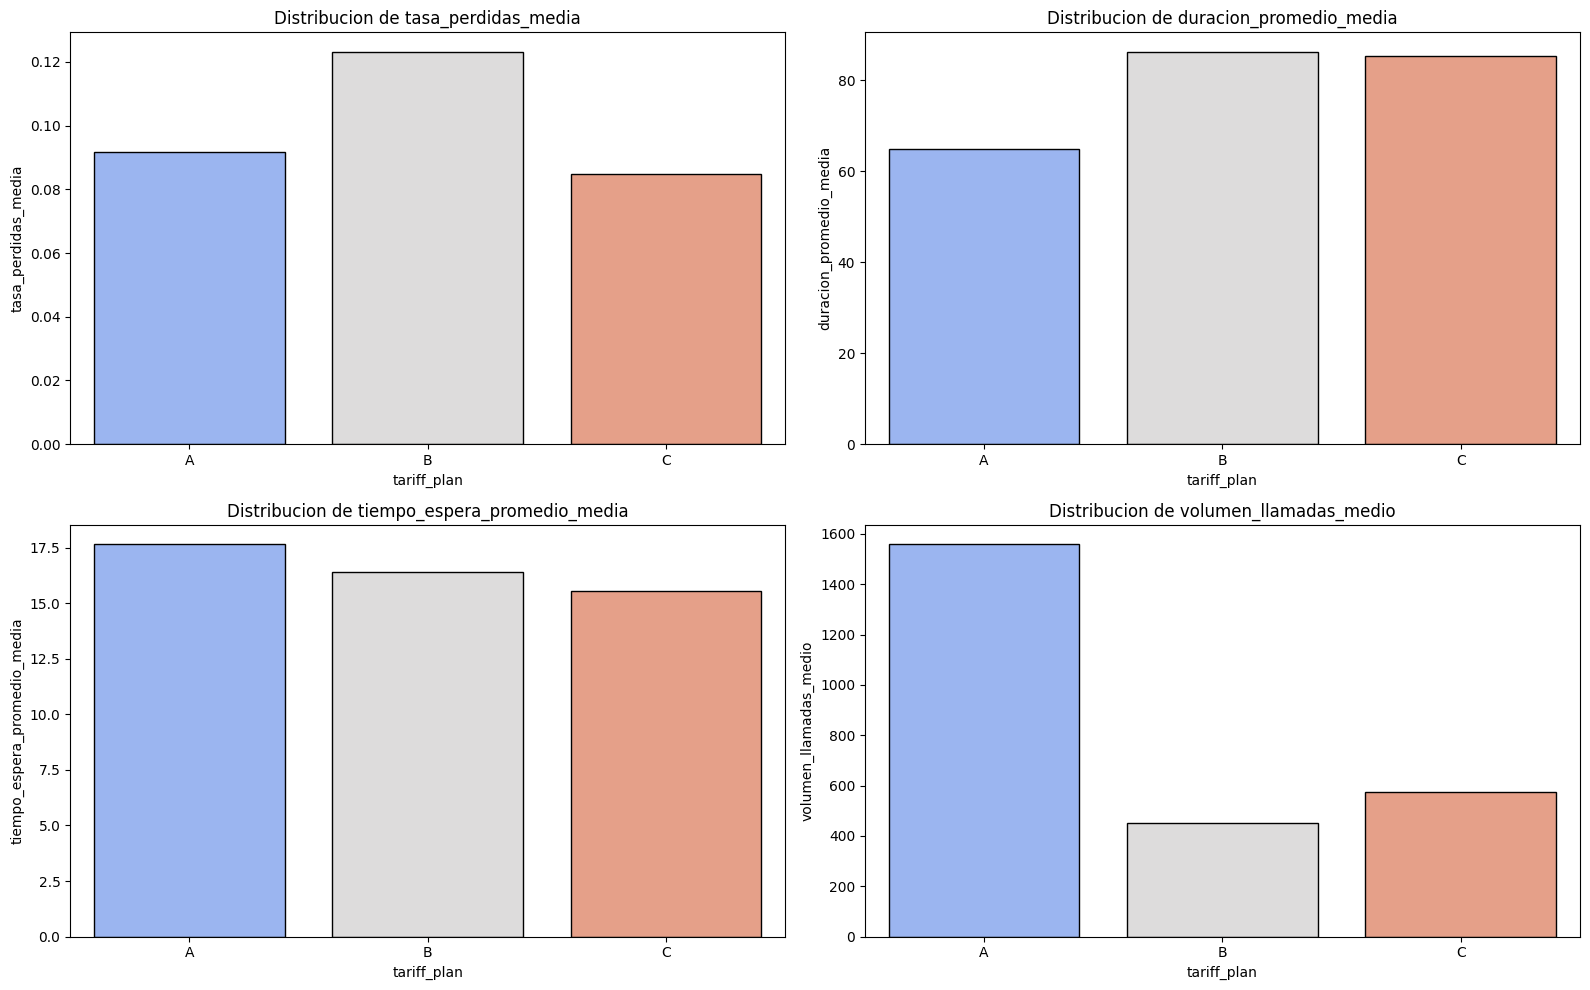

In [164]:
kPIs=['tasa_perdidas_media','duracion_promedio_media','tiempo_espera_promedio_media','volumen_llamadas_medio']

plt.figure(figsize=(16,10))

for i, KPi in enumerate(kPIs):
    plt.subplot(2,2, i+1)
    sns.barplot(data=kpis_plan,x='tariff_plan',y=KPi, palette='coolwarm', edgecolor='black',hue='tariff_plan')
    plt.title(f'Distribucion de {KPi}')
    plt.ylabel(f'{KPi}')
plt.tight_layout()
plt.show()

### <a id='toc5_6_2_'></a>[Comentarios](#toc0_)

- ``Tasa de llamadas perdidas (tasa_perdidas_media):``
El plan B presenta la tasa de llamadas perdidas promedio más alta, seguido por el plan A, y finalmente el plan C con la tasa más baja.
Aunque el plan A tiene más usuarios, su tasa de llamadas perdidas no es la más alta, lo que indica que, a pesar de gestionar un mayor volumen de clientes, mantiene un nivel de eficacia aceptable en comparación con el plan B.

- ``Duración promedio de llamada (duracion_promedio_media):``
Los planes B y C muestran duraciones promedio de llamada más altas que el plan A.
Esto puede indicar que los usuarios de los planes B y C requieren más tiempo de atención por llamada, o que los casos gestionados en estos planes son más complejos. El plan A, a pesar de tener más usuarios, logra mantener llamadas más breves en promedio, lo que puede ser señal de procesos más ágiles o de una mayor eficiencia operativa.

- `` Tiempo de espera promedio (tiempo_espera_promedio_media):``
El plan A tiene el tiempo de espera promedio más alto, seguido por el plan B y luego el plan C.
Esto sugiere que, aunque el plan A es eficiente en la gestión de llamadas perdidas y en la duración de las llamadas, la alta cantidad de usuarios puede estar generando cuellos de botella en la atención, incrementando los tiempos de espera.

- ``Volumen medio de llamadas (volumen_llamadas_medio):``
El plan A destaca con un volumen de llamadas promedio muy superior al de los otros planes, lo que es coherente con el hecho de que tiene más usuarios.
Esto refuerza la idea de que el plan A es el segmento más activo y demandante del sistema.

## <a id='toc5_7_'></a>[Prueba de Hipotesis](#toc0_)
- Con base en los resultados preliminares obtenidos hasta la este punto, se considera pertinente implementar una prueba de hipótesis estadística. Esto permitirá determinar en qué plan se agrupan los operadores con menor rendimiento, proporcionando así conclusiones válidas y fundamentadas basadas en datos. 


In [165]:
# Filtrado por tariff_plan y KPIs

#  Funcion para extraer los valores del KPI para cada plan

def perform_statistical_analysis(kpi,df,column_value):
    
    group_A= df[df[column_value]=='A'][kpi]
    group_B = df[df[column_value] == 'B'][kpi]
    group_C = df[df[column_value] == 'C'][kpi]
    
    # Realiza la prueba ANOVA

    stat, p =f_oneway(group_A, group_B, group_C)
    print(f'Estadistico F:{stat:.4f}')
    print(f'Valor p: {p:.4f}')
    if p < 0.05: 
        print(f"Hay diferencias significativas entre los grupos segun el KPI({kpi}) evaluado")
        # Aplica el test de Tukey
        tukey = pairwise_tukeyhsd(endog=operator_plan[kpi], groups=operator_plan[column_value], alpha=0.05)
        print(tukey)
    else: 
        print(f"No hay diferencias significativas entre los grupos segun el KPI({kpi}) evaluado")
    
    

In [166]:
# KPI Lost Rate Analysis

perform_statistical_analysis('lost_rate', operator_plan, 'tariff_plan')


Estadistico F:5.7318
Valor p: 0.0033
Hay diferencias significativas entre los grupos segun el KPI(lost_rate) evaluado
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.0316 0.0352  0.0017  0.0614   True
     A      C  -0.0067 0.8579 -0.0367  0.0232  False
     B      C  -0.0383 0.0041 -0.0665 -0.0102   True
----------------------------------------------------


- A vs B: Diferencia significativa (p=0.0352). El plan B tiene una tasa de llamadas perdidas significativamente mayor que el plan A.
- A vs C: No hay diferencia significativa (p=0.8579).
- B vs C: Diferencia significativa (p=0.0041). El plan B tiene una tasa de llamadas perdidas significativamente mayor que el plan C.

In [167]:
# KPI mean_duration
perform_statistical_analysis('mean_duration', operator_plan, 'tariff_plan')

Estadistico F:7.1477
Valor p: 0.0008
Hay diferencias significativas entre los grupos segun el KPI(mean_duration) evaluado
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  21.3545  0.002   6.6426 36.0664   True
     A      C  20.5352 0.0033   5.7568 35.3136   True
     B      C  -0.8193 0.9895 -14.6894 13.0508  False
-----------------------------------------------------


- A vs B: Diferencia significativa (p=0.002). El plan B tiene una duración promedio de llamada significativamente mayor que el plan A.
- A vs C: Diferencia significativa (p=0.0033). El plan C también tiene una duración promedio de llamada significativamente mayor que el plan A.
- B vs C: No hay diferencia significativa (p=0.9895).

In [168]:
# KPI mean_wait_time

perform_statistical_analysis('mean_wait_time', operator_plan, 'tariff_plan')

Estadistico F:5.6988
Valor p: 0.0035
Hay diferencias significativas entre los grupos segun el KPI(mean_wait_time) evaluado
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -1.2186 0.1222 -2.6761   0.239  False
     A      C  -2.1053 0.0022 -3.5694 -0.6412   True
     B      C  -0.8867 0.2845 -2.2609  0.4874  False
----------------------------------------------------


- A vs B: No hay diferencia significativa (p=0.1222).
- A vs C: Diferencia significativa (p=0.0022). El plan C tiene un tiempo de espera promedio significativamente menor que el plan A.
- B vs C: No hay diferencia significativa (p=0.2845).

### <a id='toc5_7_1_'></a>[Conclusiones Preliminares](#toc0_)

Tasa de llamadas perdidas ``(lost_rate)``:

- El análisis post-hoc de Tukey confirma que el plan B tiene una tasa de llamadas perdidas significativamente mayor en comparación con los planes A y C.
- Esta diferencia estadísticamente significativa respalda la observación previa de que el plan B es el segmento más problemático en términos de eficiencia operativa.
- Implicación: Los operadores asignados al plan B requieren atención prioritaria, ya que su desempeño impacta negativamente la calidad del servicio y la satisfacción del cliente.

Duración promedio de llamada ``(mean_duration)``:
- Los resultados de Tukey muestran que los planes B y C tienen duraciones promedio de llamada significativamente mayores que el plan A.
- Esto sugiere que, además de perder más llamadas, los operadores de los planes B y C dedican más tiempo por llamada, lo que puede indicar procesos menos ágiles, mayor complejidad de casos o posibles ineficiencias en la gestión.
- Implicación: Es fundamental revisar y optimizar los procedimientos, así como reforzar la capacitación de los operadores en los planes B y C, para mejorar la gestión del tiempo y aumentar la productividad.

Tiempo promedio de espera ``(mean_wait_time)``:
- El test de Tukey revela que el plan C tiene un tiempo de espera promedio significativamente menor que el plan A, mientras que no hay diferencias significativas entre los planes A y B ni entre B y C.
- Esto indica que, aunque el plan C comparte con el plan B una mayor duración de llamadas, logra mantener tiempos de espera bajos, lo que puede deberse a una mejor asignación de recursos o a una menor carga operativa.
- Implicación: El plan C puede servir como modelo de buenas prácticas para reducir los tiempos de espera en los otros planes, especialmente en el plan A, que concentra la mayor cantidad de usuarios y llamadas.
---
**Esto nos da una visión clara, donde optaremos por hacer el filtrado basado en la `tasa de llamadas perdidas` y `duración promedio de espera`, identificando operadores ineficientes. El foco de atención es el plan tarifario B por el comportamiento expresado en nuestras pruebas; sin embargo, el filtrado bajo estas métricas evaluará a todos los operadores.**

# <a id='toc6_'></a>[Operadores menos eficientes](#toc0_)


- Considerando este contexto, orientamos nuestra investigación hacia la aplicación de metodologías de control estadístico de calidad, específicamente los principios de Six Sigma. Esta metodología respalda el uso de percentiles, como el 70 o 75, para establecer umbrales de eficiencia. De acuerdo con este enfoque, los operadores que se sitúan por encima de estos percentiles en los KPIs evaluados pueden ser clasificados como ineficientes. 

- Adicionalmente, esta metodologia por su principio Matematico puede excluir de la evaluación a aquellos operadores que no cuentan con suficiente información para una clasificación confiable, garantizando así la solidez y validez de los resultados obtenidos.

In [169]:
# usando percentil 70 para lost_rate y mean_wait_time
umbral_lost_rate = operator_plan['lost_rate'].quantile(0.70)
umbral_wait_time = operator_plan['mean_wait_time'].quantile(0.70)

# Operadores menos eficientes: los que superan ambos umbrales
ineficientes = operator_plan[
    (operator_plan['lost_rate'] >= umbral_lost_rate)  &  
    (operator_plan['mean_wait_time'] >= umbral_wait_time)
]

print(ineficientes[['operator_id', 'tariff_plan', 'lost_rate', 'mean_wait_time']].sort_values(by=['lost_rate', 'mean_wait_time'], ascending=False))



     operator_id tariff_plan  lost_rate  mean_wait_time
620       932246           B   1.000000       60.000000
700       937770           A   1.000000       37.000000
163       899076           B   1.000000       23.500000
669       936296           B   0.750000       26.000000
321       908718           B   0.666667       38.666667
..           ...         ...        ...             ...
535       924930           A   0.115672       19.850746
357       911142           C   0.115385       45.615385
390       914630           B   0.113095       20.101190
601       930586           B   0.113043       20.073913
211       901996           B   0.103448       21.413793

[71 rows x 4 columns]


In [170]:
# Identificacion de los operadores menos eficientes

Id_operator_ineficiente= ineficientes['operator_id'].reset_index()
display(Id_operator_ineficiente.sort_values(by='operator_id',ascending=False))

lista_ineficientes = []

for i in Id_operator_ineficiente['operator_id']:
    lista_ineficientes.append(i)

print(lista_ineficientes)



,index,operator_id
70,1082,970254
69,1079,970244
68,1077,970240
67,1072,969288
66,1061,967310
...,...,...
4,25,884408
3,24,884406
2,12,882478
1,6,880022


[0, 880022, 882478, 884406, 884408, 886146, 888406, 888868, 891918, 892530, 892532, 892536, 893700, 898434, 898892, 898902, 899076, 900194, 900458, 900492, 901996, 905840, 908718, 909308, 911142, 914426, 914630, 914816, 914848, 915504, 917252, 917446, 918956, 924930, 924936, 924946, 924948, 926312, 930586, 930590, 930594, 932246, 934098, 936296, 937366, 937368, 937678, 937770, 937782, 937856, 937900, 940802, 940814, 940848, 944474, 947816, 951290, 951332, 951650, 952462, 952916, 954376, 955164, 958470, 959118, 962904, 967310, 969288, 970240, 970244, 970254]


## Limitaciones del Estudio 
- A partir del análisis exploratorio de los datasets, se identificaron diferencias notables entre los planes tarifarios, especialmente en el volumen de llamadas gestionadas. Sin embargo, al examinar el comportamiento individual de los operadores, se evidenció una deficiencia en la cantidad y calidad de los datos disponibles para algunos casos. Esta situación puede atribuirse principalmente a la incorporación reciente de nuevos operadores, lo que implica que la base de información para estos perfiles aún no es lo suficientemente robusta para una evaluación concluyente.

### Recomendaciones
- Para la extraccion de datos se recomienda filtrar por cohortes de ingreso de operadores a la empresa, con el fin de evaluar rendimiento en un rango similar de tiempo, a su vez una fuente de informacion mas robusta.
- Aplicar modelos Machine Learnin para distribuir la cantidad de operadores a los tipos de planes para futuras implementanciones y mejoras.



# <a id='toc7_'></a>[CONCLUSIONES GENERAL](#toc0_)

--- 
- El análisis integral de los datos operativos revela una marcada asimetría en la distribución de la actividad tanto a nivel de operadores como de usuarios, fenómeno característico en entornos de servicios de telecomunicaciones. La presencia de outliers, identificados principalmente en los extremos superiores de la distribución de llamadas, distorsiona las métricas tradicionales como la media, por lo que se recomienda priorizar la interpretación de la mediana y los percentiles para describir el comportamiento central.


- A nivel de planes tarifarios, se observan diferencias sustanciales en los patrones de uso y desempeño. El plan A, aunque representa una proporción menor de usuarios, concentra la mayor actividad operativa y volumen de llamadas, posicionándose como un segmento de alto valor estratégico. Por el contrario, el plan B destaca negativamente por presentar tasas de llamadas perdidas y duraciones promedio de llamada significativamente superiores, lo que evidencia ineficiencias operativas que requieren atención prioritaria. El plan C, si bien comparte algunas características con el plan B en cuanto a duración de llamadas, logra mantener tiempos de espera bajos, sugiriendo una mejor gestión de recursos.


- El análisis post-hoc de Tukey respalda estadísticamente estas diferencias, validando la necesidad de segmentar las estrategias de mejora y priorizar la intervención en los grupos con peor desempeño. En este contexto, la selección de los KPIs `tasa de llamadas perdidas` y `tiempo promedio de espera` como métricas principales para la evaluación individual de operadores se justifica plenamente, ya que ambos indicadores están directamente relacionados con la eficiencia operativa y la experiencia del usuario.


- Finalmente, la aplicación de metodologías de control estadístico de calidad, como Six Sigma, permite establecer umbrales de eficiencia basados en percentiles (70 o 75), identificando de manera robusta a los operadores menos eficientes y excluyendo aquellos con información insuficiente para una clasificación confiable. Este enfoque garantiza la validez y solidez de los resultados, orientando la toma de decisiones hacia la mejora continua del servicio.

---

## <a id='toc7_1_'></a>[Recomendaciones](#toc0_)

1. **Priorización de la intervención en el plan B:**  
   Implementar acciones correctivas y de capacitación focalizadas en los operadores asignados al plan B, dado su impacto negativo en la eficiencia y calidad del servicio.

2. **Optimización de recursos en el plan A:**  
   Revisar los procesos de atención y asignación de recursos en el plan A para reducir los tiempos de espera, manteniendo la eficiencia en la gestión de llamadas ante una alta demanda.

3. **Replicación de buenas prácticas del plan C:**  
   Analizar y, en la medida de lo posible, replicar las estrategias de gestión implementadas en el plan C para optimizar los tiempos de espera en los otros segmentos.

4. **Uso de percentiles para la identificación de operadores ineficientes:**  
   Aplicar umbrales basados en el percentil 70 o 75 de los KPIs seleccionados para identificar de manera objetiva a los operadores menos eficientes y orientar las acciones de mejora.

5. **Exclusión de operadores con información insuficiente:**  
   Filtrar del análisis a los operadores con baja cantidad de datos, especialmente aquellos recientemente incorporados, para asegurar la robustez y representatividad de las conclusiones.

6. **Monitoreo continuo y ajuste de estrategias:**  
   Establecer un sistema de monitoreo periódico de los KPIs clave, permitiendo la detección temprana de desviaciones y la adaptación dinámica de las estrategias de mejora.

---

# <a id='toc8_'></a>[BIBLIOGRAFIA](#toc0_)

- Montgomery, D.C. (2019). *Introduction to Statistical Quality Control* (8th ed.). Wiley.
- Breyfogle, F.W. (2003). *Implementing Six Sigma: Smarter Solutions Using Statistical Methods* (2nd ed.). Wiley.
- Koole, G. (2013). *Call Center Optimization*. MG Books.
- Anton, J. (2000). *Call Center Benchmarking: How to Measure and Improve Call Center Performance*. Purdue University Press.
- Fitzsimmons, J.A., & Fitzsimmons, M.J. (2013). *Service Management: Operations, Strategy, Information Technology* (8th ed.). McGraw-Hill.
- Hillier, F.S., & Lieberman, G.J. (2021). *Introduction to Operations Research* (11th ed.). McGraw-Hill.
- Gans, N., Koole, G., & Mandelbaum, A. (2003). "Telephone Call Centers: Tutorial, Review, and Research Prospects." *Manufacturing & Service Operations Management*, 5(2), 79-141.
- ITIL Foundation. (2019). *ITIL® Foundation: ITIL 4 Edition*. AXELOS.